# 16 pytorch tutorial


In [55]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import numpy as np 

torch.manual_seed(446)
np.random.seed(446)

In [56]:
## Tensors and relation to numpy

# we create tensors in a similar way to numpy nd arrays
x_numpy = np.array([0.1, 0.2, 0.3])
x_torch = torch.tensor([0.1, 0.2, 0.3])
print('x_numpy, x_torch')
print(x_numpy, x_torch)
print()

# to and form numpy, pytorch
print('to and from numpy and pytorch')
print(torch.from_numpy(x_numpy), x_torch.numpy())
print()

# we can do basic operations like +-*/ 
y_numpy = np.array([3, 4, 5.])
y_torch = torch.tensor([3, 4, 5.])
print("x+y")
print(x_numpy + y_numpy, x_torch + y_torch)
print()


# many functions that are in numpy are also in pytorch
print("norm")
print(np.linalg.norm(x_numpy), torch.norm(x_torch))
print

# to apply an operation along a dimension
# we use the dim keyword argument instead of axis
print("mean along the 0th dimension")
x_numpy = np.array([[1,2],[3,4.]])
x_torch = torch.tensor([[1,2],[3,4.]])
print(np.mean(x_numpy, axis=0), torch.mean(x_torch, dim=0))

x_numpy, x_torch
[0.1 0.2 0.3] tensor([0.1000, 0.2000, 0.3000])

to and from numpy and pytorch
tensor([0.1000, 0.2000, 0.3000], dtype=torch.float64) [0.1 0.2 0.3]

x+y
[3.1 4.2 5.3] tensor([3.1000, 4.2000, 5.3000])

norm
0.37416573867739417 tensor(0.3742)
mean along the 0th dimension
[2. 3.] tensor([2., 3.])


In [57]:
## Tensor.view

# "MNIST"
N, C, W, H = 1000, 3, 28, 28
X = torch.randn((N, C, W, H))

print(X.shape)
print(X.view(N, C, 784).shape)
print(X.view(-1, C, 784).shape) # automatically choose the 0th dimension

torch.Size([1000, 3, 28, 28])
torch.Size([1000, 3, 784])
torch.Size([1000, 3, 784])


In [58]:
## Broadcasting semantics

# Pytorch operations support Numpy Broadcasting Semantics
x = torch.empty(5, 1, 4, 1)
y = torch.empty(   3, 1, 1)
print((x + y).size())

torch.Size([5, 3, 4, 1])


In [59]:
## Computation graphs

a = torch.tensor(2.0, requires_grad=True) # we set requires grad=True to let pytorch know to keep the graph
b = torch.tensor(1.0, requires_grad=True)
c = a + b
d = b + 1
e = c * d
print("c", c)
print("d", d)
print("e", e)

c tensor(3., grad_fn=<AddBackward0>)
d tensor(2., grad_fn=<AddBackward0>)
e tensor(6., grad_fn=<MulBackward0>)


In [7]:
## Cuda semantics
cpu = torch.device("cpu")
gpu = torch.device("cuda")

x = torch.rand(10)
print(x)
x = x.to(gpu)
print(x)
x = x.to(cpu)
print(x)

tensor([0.4621, 0.5497, 0.9948, 0.7516, 0.4220, 0.0215, 0.5473, 0.1685, 0.5685,
        0.8785])


AssertionError: Torch not compiled with CUDA enabled

In [60]:
## Pytorch as an auto grad framework
def f(x):
    return (x - 2)**2

def fp(x):
    return 2*(x - 2)

x = torch.tensor([1.0],requires_grad=True)

y = f(x)
y.backward()

print('Analytical f\'(x):', fp(x))
print('Pytorch\'s f\'(x):', x.grad)

Analytical f'(x): tensor([-2.], grad_fn=<MulBackward0>)
Pytorch's f'(x): tensor([-2.])


In [61]:
def g(w):
    return 2*w[0]*w[1] + w[1]*torch.cos(w[0])

def grad_g(w):
    return torch.tensor([2*w[1] - w[1]*torch.sin(w[0]), 2*w[0] + torch.cos(w[0])])

w = torch.tensor([np.pi, 1], requires_grad=True)

z = g(w)
z.backward()

print('Analytical grad g(w)', grad_g(w))
print('Pytorch\'s grad g(w)', w.grad)

Analytical grad g(w) tensor([2.0000, 5.2832])
Pytorch's grad g(w) tensor([2.0000, 5.2832])


In [11]:
## Using the gradients
x = torch.tensor([5.0], requires_grad=True)
step_size = 0.25

print('iter,\tx,\tf(x),\tf\'(x),\tf\'(x) pytorch')
for i in range(15):
    y = f(x)
    y.backward() # compute the gradient

    print('{},\t{:.3f},\t{:.3f},\t{:.3f},\t{:.3f}', format(i, x.item(), f(x).item(), fp(x).item(), x.grad.item()))

    x.data = x.data - step_size * x.grad # perform a GD update step

    # We need to zero the grad variable since the backward()
    # call accumulates the gradients in, grad instead of overwriting.
    # The detach_() is for efficiency. You do not need to worry too much about it.
    x.grad.detach_()
    x.grad.zero_()


iter,	x,	f(x),	f'(x),	f'(x) pytorch


TypeError: format() takes at most 2 arguments (5 given)

In [62]:
## Using the gradients
x = torch.tensor([5.0], requires_grad=True)
step_size = 0.25

print('iter,\tx,\tf(x),\tf\'(x),\tf\'(x) pytorch')
for i in range(15):
    y = f(x)
    y.backward() # compute the gradient

    print('{},\t{:.3f},\t{:.3f},\t{:.3f},\t{:.3f}'. format(i, x.item(), f(x).item(), fp(x).item(), x.grad.item()))

    x.data = x.data - step_size * x.grad # perform a GD update step

    # We need to zero the grad variable since the backward()
    # call accumulates the gradients in, grad instead of overwriting.
    # The detach_() is for efficiency. You do not need to worry too much about it.
    x.grad.detach_()
    x.grad.zero_()

iter,	x,	f(x),	f'(x),	f'(x) pytorch
0,	5.000,	9.000,	6.000,	6.000
1,	3.500,	2.250,	3.000,	3.000
2,	2.750,	0.562,	1.500,	1.500
3,	2.375,	0.141,	0.750,	0.750
4,	2.188,	0.035,	0.375,	0.375
5,	2.094,	0.009,	0.188,	0.188
6,	2.047,	0.002,	0.094,	0.094
7,	2.023,	0.001,	0.047,	0.047
8,	2.012,	0.000,	0.023,	0.023
9,	2.006,	0.000,	0.012,	0.012
10,	2.003,	0.000,	0.006,	0.006
11,	2.001,	0.000,	0.003,	0.003
12,	2.001,	0.000,	0.001,	0.001
13,	2.000,	0.000,	0.001,	0.001
14,	2.000,	0.000,	0.000,	0.000


In [63]:
## Linear Regression

# make a simple linear dataset with some noise

d = 2
n = 50
X = torch.randn(n,d)
true_w = torch.tensor([[-1.0],[2.0]])
y = X @ true_w + torch.randn(n,1) * 0.1
print('X shape', X.shape)
print('y shape', y.shape)
print('w shape', true_w.shape)

X shape torch.Size([50, 2])
y shape torch.Size([50, 1])
w shape torch.Size([2, 1])


In [64]:
# define a linear model with no bias
def model(X, w):
    return X @ w

# the residual sum of squares loss function
def rss(y, y_hat):
    return torch.norm(y - y_hat)**2 / n

# analytical expression for the gradient
def grad_rss(X, y, w):
    return -2*X.t() @ (y - X @ w) / n

w = torch.tensor([[1.], [0]], requires_grad=True)
y_hat = model(X, w)

loss = rss(y, y_hat)
loss.backward()

print('Analytical gradient', grad_rss(X, y, w).detach().view(2).numpy())
print('Pytorch\'s gradient', w.grad.view(2).numpy())

Analytical gradient [ 2.5017328 -2.8934634]
Pytorch's gradient [ 2.5017326 -2.8934634]


==与视频结果不同==

In [65]:
## Linear regression using GD with automatically computed derivatives
step_size = 0.1

print('iter,\tloss,\tw')
for i in range(20):
    y_hat = model(X, w)
    loss = rss(y, y_hat)

    loss.backward() # compute the gradient of the loss

    w.data = w.data - step_size * w.grad # do a gradient descent step

    print('{},\t{:.2f},\t{}'.format(i, loss.item(), w.view(2).detach().numpy())) 

    # we need to zero the grad variable since the backward()
    # call accumulates the gradients in .grad instead of overwriting.
    # The detach() is for efficiency. You do not need to worry too mach about is.
    w.grad.detach()
    w.grad.zero_() 

print('\ntrue w\t\t', true_w.view(2).numpy())
print('estimated w\t', w.view(2).detach().numpy())

iter,	loss,	w
0,	5.37,	[0.49965346 0.5786927 ]
1,	2.85,	[0.30848873 0.7799183 ]
2,	2.13,	[0.1410022  0.95148206]
3,	1.60,	[-0.00546882  1.0980128 ]
4,	1.20,	[-0.13336132  1.2233584 ]
5,	0.90,	[-0.24488364  1.3307297 ]
6,	0.67,	[-0.34202108  1.4228166 ]
7,	0.51,	[-0.4265473  1.5018799]
8,	0.38,	[-0.5000386  1.5698256]
9,	0.29,	[-0.56389034  1.6282657 ]
10,	0.22,	[-0.619333   1.6785666]
11,	0.17,	[-0.6674488  1.7218894]
12,	0.13,	[-0.70918715  1.7592229 ]
13,	0.10,	[-0.7453792  1.7914108]
14,	0.07,	[-0.77675146  1.819174  ]
15,	0.06,	[-0.8039379  1.8431299]
16,	0.05,	[-0.82749116  1.863807  ]
17,	0.04,	[-0.84789234  1.881659  ]
18,	0.03,	[-0.86556    1.8970759]
19,	0.03,	[-0.88085794  1.9103924 ]

true w		 [-1.  2.]
estimated w	 [-0.88085794  1.9103924 ]


In [66]:
# Linear Module
d_in = 3
d_out = 4
linear_module = nn.Linear(d_in, d_out)

example_tensor = torch([[1.,2,3], [4,5,6]])
# apply a linear transformation to the data
transformed = linear_module(example_tensor)
print('example_tensor', example_tensor.shape)
print('transormed', transformed.shape)
print()
print('We can see that the weights exist in the background\n')
print('W:', linear_module.weight)
print('b:', linear_module.bias)

TypeError: 'module' object is not callable

In [67]:
# Linear Module
d_in = 3
d_out = 4
linear_module = nn.Linear(d_in, d_out)

example_tensor = torch.tensor([[1.,2,3], [4,5,6]])
# apply a linear transformation to the data
transformed = linear_module(example_tensor)
print('example_tensor', example_tensor.shape)
print('transormed', transformed.shape)
print()
print('We can see that the weights exist in the background\n')
print('W:', linear_module.weight)
print('b:', linear_module.bias)

example_tensor torch.Size([2, 3])
transormed torch.Size([2, 4])

We can see that the weights exist in the background

W: Parameter containing:
tensor([[-0.0772, -0.2093,  0.0958],
        [-0.4789,  0.0069, -0.0588],
        [-0.1015,  0.0166,  0.0020],
        [ 0.3538, -0.4454, -0.4154]], requires_grad=True)
b: Parameter containing:
tensor([-0.0353,  0.2419,  0.3646,  0.2517], requires_grad=True)


In [23]:
## Activation function
activation_fn = nn.ReLU() # we instantiate an instance of the ReLU module
example_tensor = torch.tensor([-1.0, 1.0, 0.0])
activated = activation_fn(example_tensor)
print('example_tensor', example_tensor)
print('activated', activated)

example_tensor tensor([-1.,  1.,  0.])
activated tensor([0., 1., 0.])


In [24]:
## Sequential
d_in = 3
d_hidden = 4
d_out = 1
model = torch.nn.Sequential(
    nn.Linear(d_in, d_hidden), nn.Tanh(), nn.Linear(d_hidden, d_out), nn.Sigmoid()
)

example_tensor = torch.tensor([[1.,2,3],[4,5,6]])
transformed = model(example_tensor)
print('transformed', transformed.shape)

transformed torch.Size([2, 1])


In [25]:
params = model.parameters()

for param in params:
    print(param)

Parameter containing:
tensor([[-0.5135, -0.2740,  0.3096],
        [ 0.1144,  0.0572,  0.1305],
        [-0.1868,  0.4462, -0.2422],
        [ 0.5562,  0.2181, -0.5440]], requires_grad=True)
Parameter containing:
tensor([-0.2327,  0.0183,  0.0442,  0.4625], requires_grad=True)
Parameter containing:
tensor([[-0.1062,  0.2540, -0.4678,  0.3345]], requires_grad=True)
Parameter containing:
tensor([-0.0373], requires_grad=True)


In [26]:
## Loss functions
mes_loss_fn = nn.MSELoss()

input = torch.tensor([[0., 0, 0]])
target = torch.tensor([[1., 0, -1]])

loss = mes_loss_fn(input, target)

print(loss)

tensor(0.6667)


In [68]:
## torch.optim

# create a simple model
model = nn.Linear(1,1)

# create a simple dataset
X_simple = torch.tensor([[1.]])
y_simple = torch.tensor([[2.]])

# create our optimizer
optim = torch.optim.SGD(model.parameters(), lr=le.2)
mes_loss_fn = nn.MSELoss()

y_hat = model(X_simple)
print('model params before:', model.weight)
loss = mes_loss_fn(y_hat, y_simple)
optim.zero_grad()
loss.backward()
optim.step()
print('model params after:', model.weight)

SyntaxError: invalid syntax (<ipython-input-68-8b2bac1ccc21>, line 11)

In [34]:
## torch.optim

# create a simple model
model = nn.Linear(1,1)

# create a simple dataset
X_simple = torch.tensor([[1.]])
y_simple = torch.tensor([[2.]])

# create our optimizer
optim = torch.optim.SGD(model.parameters(), lr=0.2)
mes_loss_fn = nn.MSELoss()

y_hat = model(X_simple)
print('model params before:', model.weight)
loss = mes_loss_fn(y_hat, y_simple)
optim.zero_grad()
loss.backward()
optim.step()
print('model params after:', model.weight)

model params before: Parameter containing:
tensor([[-0.9206]], requires_grad=True)
model params after: Parameter containing:
tensor([[-0.0645]], requires_grad=True)


In [69]:
## torch.optim

# create a simple model
model = nn.Linear(1,1)

# create a simple dataset
X_simple = torch.tensor([[1.]])
y_simple = torch.tensor([[2.]])

# create our optimizer
optim = torch.optim.SGD(model.parameters(), lr=1e-2)
mes_loss_fn = nn.MSELoss()

y_hat = model(X_simple)
print('model params before:', model.weight)
loss = mes_loss_fn(y_hat, y_simple)
optim.zero_grad()
loss.backward()
optim.step()
print('model params after:', model.weight)

model params before: Parameter containing:
tensor([[0.1371]], requires_grad=True)
model params after: Parameter containing:
tensor([[0.1669]], requires_grad=True)


In [70]:
## Linear regression using GD with automatically computed derivatives and Pythorch's modules
step_size = 0.1

linear_module = nn.Linear(d, 1, bias=False)

loss_func = nn.MSELoss()

optim = torch.optim.SGD(linear_module.parameters(), lr=step_size)

print('iter,\tloss,\tw')

for i in range(20):
    y_hat = linear_module(X)
    loss = loss_func(y_hat, y)
    optim.zero_grad()
    loss.backward()
    optim.step()


    print('{},\t{:.2f},\t{}'.format(i, loss.item(), linear_module.weight.view(2).detach().numpy()))

print('\ntrue w\t\t', true_w.view(2).numpy())
print('estimated w\t', linear_module.weight.view(2).detach().numpy())

iter,	loss,	w
0,	2.54,	[0.20545287 0.82055604]
1,	1.90,	[0.05459599 0.98980343]
2,	1.42,	[-0.07817125  1.1335365 ]
3,	1.06,	[-0.1947204  1.2558669]
4,	0.80,	[-0.29681334  1.3601841 ]
5,	0.60,	[-0.3860812  1.4492948]
6,	0.45,	[-0.4640152  1.5255331]
7,	0.34,	[-0.5319655  1.5908474]
8,	0.26,	[-0.59114504  1.6468705 ]
9,	0.19,	[-0.64263684  1.6949751 ]
10,	0.15,	[-0.687403   1.7363191]
11,	0.11,	[-0.7262949  1.7718817]
12,	0.09,	[-0.7600629  1.8024935]
13,	0.07,	[-0.78936696  1.82886   ]
14,	0.05,	[-0.8147859  1.8515826]
15,	0.04,	[-0.8368263  1.8711743]
16,	0.03,	[-0.855931   1.8880736]
17,	0.03,	[-0.87248623  1.9026557 ]
18,	0.02,	[-0.8868287  1.9152424]
19,	0.02,	[-0.8992515  1.9261098]

true w		 [-1.  2.]
estimated w	 [-0.8992515  1.9261098]


In [71]:
## Linear regression using SGD
step_size = 0.01

linear_module = nn.Linear(d, 1)
loss_func = nn.MSELoss()
optim = torch.optim.SGD(linear_module.parameters(), lr=step_size)
print('iter,\tloss,\tw')
for i in range(200):
    rand_idx = np.random.choice(n) # take a random point from the dataset
    x = X[rand_idx]
    y_hat = linear_module(x)
    loss = loss_func(y_hat, y[rand_idx]) # only compute the loss on the single point
    optim.zero_grad()
    loss.backward()
    optim.step()

    if i % 20 == 0:
        print('{},\t{:.2f},\t{}'.format(i, loss.item(), linear_module.weight.view(2).detach().numpy()))

print('\ntrue w\t\t', true_w.view(2).numpy())
print('estimated w\t', linear_module.weight.view(2).detach().numpy())

iter,	loss,	w
0,	3.82,	[ 0.17412634 -0.14807644]
20,	4.60,	[-0.08190873  0.41125894]
40,	0.00,	[-0.21793523  0.9539009 ]
60,	0.81,	[-0.3078509  1.3925565]
80,	0.03,	[-0.45257547  1.4924994 ]
100,	0.04,	[-0.46622568  1.6491145 ]
120,	0.58,	[-0.6186273  1.7372364]
140,	0.02,	[-0.73122144  1.7594988 ]
160,	0.00,	[-0.7914891  1.8095429]
180,	0.14,	[-0.85330856  1.8732904 ]

true w		 [-1.  2.]
estimated w	 [-0.8751372  1.892002 ]


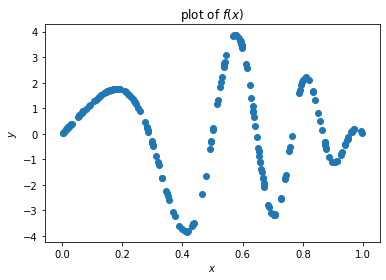

In [43]:
## Neural Network Basics in pytorch
%matplotlib inline

d = 1
n = 200
X = torch.rand(n,d)
y = 4 * torch.sin(np.pi * X) * torch.cos(6*np.pi*X**2)

plt.scatter(X.numpy(), y.numpy())
plt.title('plot of $f(x)$')
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.show()

In [53]:
# feel free to play with these parameters
step_size = 0.05
n_epochs = 6000
n_hidden_1 = 32
n_hidden_2 = 32
d_out = 1

neural_network = nn.Sequential(
    nn.Linear(d, n_hidden_1), nn.Tanh(), nn.Linear(n_hidden_1, n_hidden_2), nn.Tanh(), nn.Linear(n_hidden_2, d_out)
)

loss_func = nn.MSELoss()

optim = torch.optim.SGD(neural_network.parameters(), lr=step_size)
print('iter, \tloss')
for i in range(n_epochs):
    y_hat = neural_network(X)
    loss = loss_func(y_hat, y)
    optim.zero_grad()
    loss.backward()
    optim.step()

    if i % (n_epochs // 10) == 0:
        print('{},\t{:.2f}'.format(i, loss.item()))

iter, 	loss
0,	3.90
600,	3.62
1200,	3.61
1800,	3.61
2400,	3.61
3000,	3.61
3600,	3.60
4200,	3.41
4800,	1.34
5400,	0.76


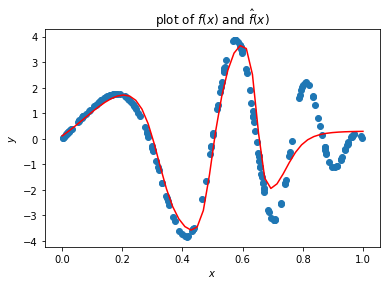

In [54]:
X_grid = torch.from_numpy(np.linspace(0,1,50)).float().view(-1, d)
y_hat = neural_network(X_grid)
plt.scatter(X.numpy(), y.numpy())
plt.plot(X_grid.detach().numpy(), y_hat.detach().numpy(), 'r')
plt.title('plot of $f(x)$ and $\hat{f}(x)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [74]:
## Things that might help the homework

# feel free to play with these parameters

step_size = 0.05
momentum = 0.9
n_epochs = 1500
n_hidden_1 = 32
n_hidden_2 = 32
d_out = 1

neural_network = nn.Sequential(
    nn.Linear(d, n_hidden_1), nn.Tanh(), nn.Linear(n_hidden_1, n_hidden_2), nn.Tanh(), nn.Linear(n_hidden_2, d_out)
)

loss_func = nn.MSELoss()

optim = torch.optim.SGD(neural_network.parameters(), lr=step_size, momentum=momentum)
print('iter, \tloss')
for i in range(n_epochs):
    y_hat = neural_network(X)
    loss = loss_func(y_hat, y)
    optim.zero_grad()
    loss.backward()
    optim.step()

    if i % (n_epochs // 10) == 0:
        print('{},\t{:.2f}'.format(i, loss.item()))


iter, 	loss
0,	3.48
150,	0.01
300,	0.01
450,	0.01
600,	0.01
750,	0.01
900,	0.01
1050,	0.01
1200,	0.01
1350,	0.00


== 收敛速度更快 ==

ValueError: x and y must be the same size

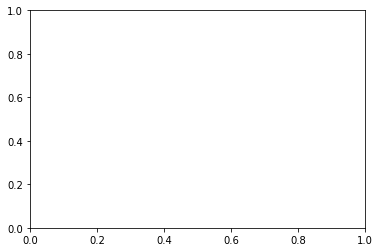

In [75]:
X_grid = torch.from_numpy(np.linspace(0,1,50)).float().view(-1, d)
y_hat = neural_network(X_grid)
plt.scatter(X.numpy(), y.numpy())
plt.plot(X_grid.detach().numpy(), y_hat.detach().numpy(), 'r')
plt.title('plot of $f(x)$ and $\hat{f}(x)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [76]:
## CrossEntropyloss
loss = nn.CrossEntropyLoss()

input = torch.tensor([[-1.,1],[-1,1],[1,-1]]) # raw scores correspond to the correct class
# input = torch.tensor([[-3.,3],[-3,3],[3,-3]]) # raw scores correspond to the correct class with higher confidence
# input = torch.tensor([[1.,-1],[1,-1],[-1,1]]) # raw scores correspond to the incorrect class
# input = torch.tensor([[3.,-3],[3,-3],[-3,3]]) # raw scores correspond to the incorrect class with higher confidence

target = torch.tensor([1,1,0])
output = loss(input, target)
print(output)

tensor(0.1269)


In [78]:
## Convolutions

# an entire mnist digit
image = np.array([0., 0., 0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0., 0.,0., 0., 0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0.])
image_torch = torch.from_numpy(image).view(1,1,28,28)

RuntimeError: shape '[1, 1, 28, 28]' is invalid for input of size 31

In [79]:
# a gaussian blur kernel
gaussian_kernel = torch.tensor([[1.,2,1],[2,4,2],[1,2,1]]) / 16.0

conv= nn.Conv2d(1,1,3)
# manually set the conv weight
conv.weight.data[:] = gaussian_kernel

convolved = conv(image_torch)

plt.title('original image')
plt.imshow(image_torch.view(28,28).detach().numpy*())
plt.show()

plt.title('blurred image')
plt.imshow(convolved.view(26,26).detach().numpy())
plt.show

NameError: name 'image_torch' is not defined

In [80]:
## Dataset class
from torch.utils.data import Dataset, DataLoader

class FakeDataset(Dataset):

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [81]:
x = np.random.rand(100, 10)
y = np.random.rand(100)

dataset = FakeDataset(x, y)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=4)

for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched)

RuntimeError: DataLoader worker (pid(s) 12172, 12268, 15416, 6540) exited unexpectedly

== 数据大小不一样，使用collate_fn==

In [83]:
## apex.amp

from apex import amp

# declare module and optimizer as usual, with default (FP32) precision
model = torch.nn.Linear(10, 100).cuda()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

# allow amp to perform casts as required by the opt_level
model, optimizer = amp.initialize(model, optimizer, opt_level="01")

# loss.backward() becomes:
with amp.scale_loss(loss, optimizer) as scaled_loss:
    scaled_loss.backward()

ModuleNotFoundError: No module named 'apex'

==英伟达的apex==